### CVAE and VAE realization

VAE was realized; it turns into CVAE by setting conditional = True instead of False. 

In [2]:
# Uploading module CVAE.py to colab server for using PyTorch.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving CVAE.py to CVAE.py
User uploaded file "CVAE.py" with length 8215 bytes


In [0]:
# Import standard modules.
import os
import time
import torch
import argparse
import pandas as pd
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from collections import defaultdict

In [0]:
# Import module VAE, standard loss function for VAE and function responsible for training.
from CVAE import VAE, loss_VAE, train_VAE

In [0]:
import matplotlib.pylab as plt
%matplotlib inline

In [0]:
# Starting device for calculations.
torch.manual_seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed(0)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
# Loading dataset MNIST.
dataset = MNIST(root='data', train=True, transform=transforms.ToTensor(), download=True)
data_loader = DataLoader(dataset=dataset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

 99%|█████████▉| 9846784/9912422 [00:33<00:00, 346282.15it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



0it [00:00, ?it/s]
  0%|          | 0/28881 [00:00<?, ?it/s]


32768it [00:00, 125578.79it/s]           
0it [00:00, ?it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


 99%|█████████▉| 1638400/1648877 [00:12<00:00, 149624.71it/s]

0it [00:00, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




  0%|          | 0/4542 [00:00<?, ?it/s]

8192it [00:00, 44383.71it/s]            

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


In [0]:
# Initializing CVAE with 2-dimensional latent space.
cvae = VAE(
        encoder_layer_sizes=[784, 256, 64],
        latent_size=2,
        decoder_layer_sizes=[64, 256, 784],
        conditional=True,
        num_labels=10).to(device)

In [9]:
# Training CVAE.
clog = train_VAE(cvae, device, data_loader)

Epoch 00/50 Batch 0000/937, Loss  543.4011
Epoch 00/50 Batch 0100/937, Loss  205.4473
Epoch 00/50 Batch 0200/937, Loss  172.0365
Epoch 00/50 Batch 0300/937, Loss  170.8638
Epoch 00/50 Batch 0400/937, Loss  161.3579
Epoch 00/50 Batch 0500/937, Loss  151.0773
Epoch 00/50 Batch 0600/937, Loss  157.1652
Epoch 00/50 Batch 0700/937, Loss  153.9571
Epoch 00/50 Batch 0800/937, Loss  159.9479
Epoch 00/50 Batch 0900/937, Loss  161.6620
Epoch 00/50 Batch 0937/937, Loss  145.1361
Epoch 01/50 Batch 0000/937, Loss  146.3928
Epoch 01/50 Batch 0100/937, Loss  146.4885
Epoch 01/50 Batch 0200/937, Loss  148.6547
Epoch 01/50 Batch 0300/937, Loss  135.0985
Epoch 01/50 Batch 0400/937, Loss  140.1828
Epoch 01/50 Batch 0500/937, Loss  137.2558
Epoch 01/50 Batch 0600/937, Loss  134.0114
Epoch 01/50 Batch 0700/937, Loss  129.9714
Epoch 01/50 Batch 0800/937, Loss  145.2571
Epoch 01/50 Batch 0900/937, Loss  140.4999
Epoch 01/50 Batch 0937/937, Loss  134.7928
Epoch 02/50 Batch 0000/937, Loss  136.5918
Epoch 02/50

In [0]:
# Creating 10 images, 1 for every label, by sampling and decoding.
c = torch.arange(0, 10).long().unsqueeze(1)
x = cvae.inference(batch_size=c.size(0), cond=c)

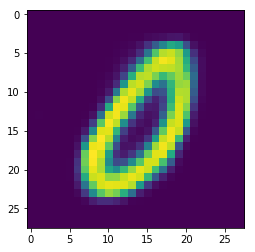

In [12]:
# 0 is OK.
plt.imshow(x[0].view(28, 28).data.numpy())

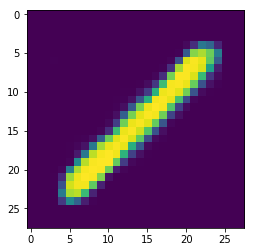

In [13]:
# 1 is OK.
plt.imshow(x[1].view(28, 28).data.numpy())

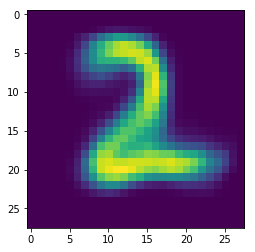

In [14]:
# 2 is OK.
plt.imshow(x[2].view(28, 28).data.numpy())

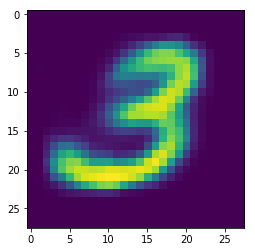

In [15]:
# 3 is OK.
plt.imshow(x[3].view(28, 28).data.numpy())

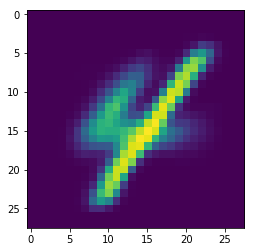

In [16]:
# 4 is OK.
plt.imshow(x[4].view(28, 28).data.numpy())

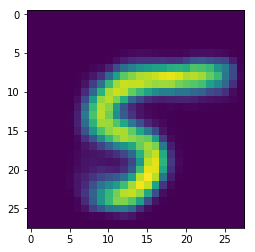

In [17]:
# 5 is OK.
plt.imshow(x[5].view(28, 28).data.numpy())

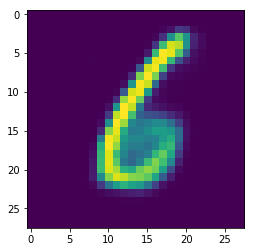

In [18]:
# 6 is OK.
plt.imshow(x[6].view(28, 28).data.numpy())

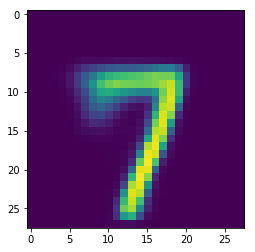

In [19]:
# 7 is OK.
plt.imshow(x[7].view(28, 28).data.numpy())

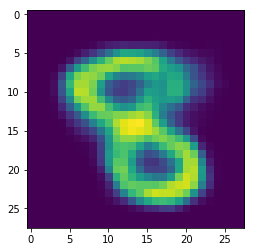

In [20]:
# 8 is OK.
plt.imshow(x[8].view(28, 28).data.numpy())

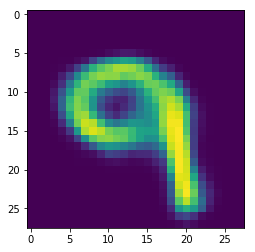

In [21]:
# 9 is OK.
plt.imshow(x[9].view(28, 28).data.numpy())

All digits are readable; loss decreases.

In [0]:
# Creating simple VAE.
vae = VAE(
        encoder_layer_sizes=[784, 256, 64],
        latent_size=2,
        decoder_layer_sizes=[64, 256, 784],
        conditional=False).to(device)

In [24]:
# Training VAE with the same parameters.
log = train_VAE(vae, device, data_loader)

Epoch 00/50 Batch 0000/937, Loss  542.9379
Epoch 00/50 Batch 0100/937, Loss  205.9868
Epoch 00/50 Batch 0200/937, Loss  194.4642
Epoch 00/50 Batch 0300/937, Loss  181.5301
Epoch 00/50 Batch 0400/937, Loss  182.1706
Epoch 00/50 Batch 0500/937, Loss  173.9577
Epoch 00/50 Batch 0600/937, Loss  173.7157
Epoch 00/50 Batch 0700/937, Loss  168.6598
Epoch 00/50 Batch 0800/937, Loss  161.3143
Epoch 00/50 Batch 0900/937, Loss  166.1620
Epoch 00/50 Batch 0937/937, Loss  170.2426
Epoch 01/50 Batch 0000/937, Loss  161.7330
Epoch 01/50 Batch 0100/937, Loss  164.7715
Epoch 01/50 Batch 0200/937, Loss  165.8620
Epoch 01/50 Batch 0300/937, Loss  169.8395
Epoch 01/50 Batch 0400/937, Loss  159.7900
Epoch 01/50 Batch 0500/937, Loss  162.8530
Epoch 01/50 Batch 0600/937, Loss  153.0321
Epoch 01/50 Batch 0700/937, Loss  148.8375
Epoch 01/50 Batch 0800/937, Loss  156.0901
Epoch 01/50 Batch 0900/937, Loss  150.6448
Epoch 01/50 Batch 0937/937, Loss  162.8499
Epoch 02/50 Batch 0000/937, Loss  160.2934
Epoch 02/50

In [0]:
# Sampling 10 images.
x = vae.inference(batch_size=c.size(0))

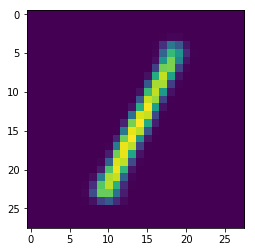

In [26]:
# Readable 1.
plt.imshow(x[0].view(28, 28).data.numpy())

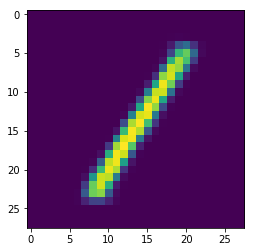

In [27]:
# Readable 1.
plt.imshow(x[1].view(28, 28).data.numpy())

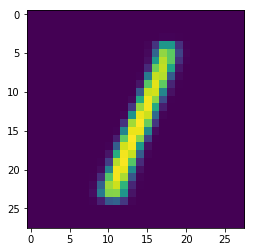

In [28]:
# Readable 1.
plt.imshow(x[2].view(28, 28).data.numpy())

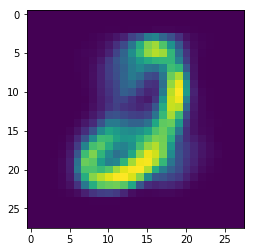

In [29]:
# Unreadable. What is it: 2 or 0?
plt.imshow(x[3].view(28, 28).data.numpy())

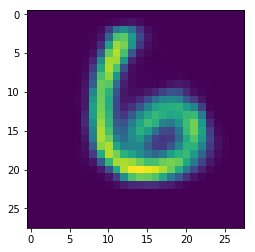

In [30]:
# Readable 6.
plt.imshow(x[4].view(28, 28).data.numpy())

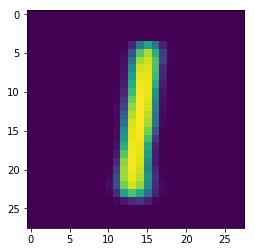

In [31]:
# Readable 1.
plt.imshow(x[5].view(28, 28).data.numpy())

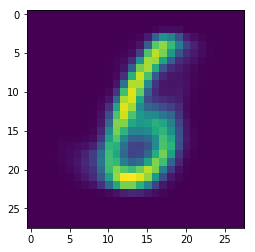

In [32]:
# Readable 6.
plt.imshow(x[6].view(28, 28).data.numpy())

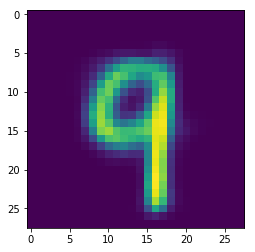

In [33]:
# Readable 9.
plt.imshow(x[7].view(28, 28).data.numpy())

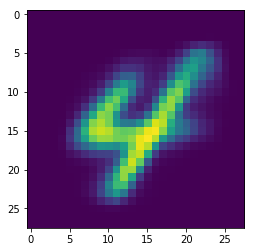

In [34]:
# Readable 4.
plt.imshow(x[8].view(28, 28).data.numpy())

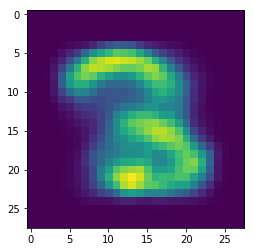

In [35]:
# Blurry 3.
plt.imshow(x[9].view(28, 28).data.numpy())

Digits without regularity; some of them are less readable than from CVAE.
Loss decreases, but a bit slower.

#### So, CVAE is better for generating digits than VAE.